price = f (points, year, province, region_1, variety, winery)

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv('data/winemag-data-130k-v2.csv',index_col='Unnamed: 0')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [42]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.dropna(subset=['price','points','variety'] ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111592 entries, 1 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                111537 non-null  object 
 1   description            111592 non-null  object 
 2   designation            79533 non-null   object 
 3   points                 111592 non-null  int64  
 4   price                  111592 non-null  float64
 5   province               111537 non-null  object 
 6   region_1               93580 non-null   object 
 7   region_2               46568 non-null   object 
 8   taster_name            88320 non-null   object 
 9   taster_twitter_handle  83837 non-null   object 
 10  title                  111592 non-null  object 
 11  variety                111592 non-null  object 
 12  winery                 111592 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB


<AxesSubplot:>

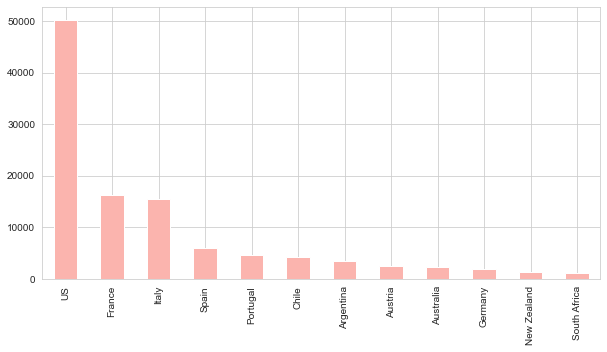

In [43]:
df = df[df['country'].isin(df['country'].value_counts()[df['country'].value_counts()>500].index)]

df_country = df['country'].value_counts()
df_country.plot(kind='bar',figsize=(10,5),cmap='Pastel1')

In [44]:
#Extract the year from the title column
df['year'] = df['title'].str.extract('(\d{4})',expand=False)
df.dropna(subset=['year'],inplace=True)
df['year'] = df['year'].astype(int)

#keep only the years between 1970 and 2022
df = df[df['year']>1970]
df = df[df['year']<2022]

df['year'].describe()

count    105383.000000
mean       2010.642599
std           3.640036
min        1973.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

In [45]:
df.drop(['description','designation','taster_twitter_handle','taster_name','region_2','title','country'],axis=1, inplace=True)

#remove outliers in price
df = df[df['price']<100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101731 entries, 1 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   points    101731 non-null  int64  
 1   price     101731 non-null  float64
 2   province  101731 non-null  object 
 3   region_1  86419 non-null   object 
 4   variety   101731 non-null  object 
 5   winery    101731 non-null  object 
 6   year      101731 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [46]:
top_province = df['province'].value_counts()
df = df[df['province'].isin(top_province.index[:1000])]

top_variety = df['variety'].value_counts()
df = df[df['variety'].isin(top_variety.index[:1000])]

top_region_1 = df['region_1'].value_counts()
df = df[df['region_1'].isin(top_region_1.index[:1000])]

In [47]:
top_winery = df['winery'].value_counts()
df = df[df['winery'].isin(top_winery.index[:1000])]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36376 entries, 7 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   points    36376 non-null  int64  
 1   price     36376 non-null  float64
 2   province  36376 non-null  object 
 3   region_1  36376 non-null  object 
 4   variety   36376 non-null  object 
 5   winery    36376 non-null  object 
 6   year      36376 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ MB


In [49]:
df.head()

,points,price,province,region_1,variety,winery,year
7,87,24.0,Alsace,Alsace,Gewürztraminer,Trimbach,2012
9,87,27.0,Alsace,Alsace,Pinot Gris,Jean-Baptiste Adam,2012
10,87,19.0,California,Napa Valley,Cabernet Sauvignon,Kirkland Signature,2011
12,87,34.0,California,Alexander Valley,Cabernet Sauvignon,Louis M. Martini,2012
14,87,12.0,California,Central Coast,Chardonnay,Mirassou,2012


In [50]:
#One hot encoding of the categorical variables
#province, region_1, variety, winery
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(categories='auto')

OHE.fit(df[['province','region_1','variety','winery']])
OHE.transform(df[['province','region_1','variety','winery']]).toarray()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36376 entries, 7 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   points    36376 non-null  int64  
 1   price     36376 non-null  float64
 2   province  36376 non-null  object 
 3   region_1  36376 non-null  object 
 4   variety   36376 non-null  object 
 5   winery    36376 non-null  object 
 6   year      36376 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ MB


In [51]:
df.columns

Index(['points', 'price', 'province', 'region_1', 'variety', 'winery', 'year'], dtype='object')

In [52]:
#create target variable and features, afterward split the data into train and test
from sklearn.model_selection import train_test_split

target = df['price'].copy()
features = df[['points','year']].copy()
#features = df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=0)

In [53]:
#OLS with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

#print regression score and mean squared error
print("MSE: %.2f"
      % mean_squared_error(y_test, model_1.predict(X_test)))
print('R2: %.2f' % r2_score(y_test, model_1.predict(X_test)))

MSE: 241.96
R2: 0.33


In [54]:
#DNN with scikit-learn
from sklearn.neural_network import MLPRegressor

model_sklearn = MLPRegressor(hidden_layer_sizes=(200,200,200), max_iter=1000, alpha=0.0001,
                     solver='adam', verbose=10, tol=0.000000001, random_state=1,
                     learning_rate_init=0.01, learning_rate='adaptive')

model_sklearn.fit(X_train, y_train)

Iteration 1, loss = 11199.13386979
Iteration 2, loss = 188.80100046
Iteration 3, loss = 187.34318473
Iteration 4, loss = 184.62129360
Iteration 5, loss = 180.62091259
Iteration 6, loss = 178.92182361
Iteration 7, loss = 181.50965788
Iteration 8, loss = 173.55239175
Iteration 9, loss = 166.21840954
Iteration 10, loss = 165.46164511
Iteration 11, loss = 159.02183025
Iteration 12, loss = 156.41490098
Iteration 13, loss = 148.54119281
Iteration 14, loss = 151.89516552
Iteration 15, loss = 147.37213436
Iteration 16, loss = 141.89199989
Iteration 17, loss = 150.64244761
Iteration 18, loss = 141.93541381
Iteration 19, loss = 138.55597169
Iteration 20, loss = 136.80653282
Iteration 21, loss = 138.79230747
Iteration 22, loss = 133.99912238
Iteration 23, loss = 139.59440694
Iteration 24, loss = 158.04212174
Iteration 25, loss = 184.73582420
Iteration 26, loss = 183.31469493
Iteration 27, loss = 180.34747729
Iteration 28, loss = 179.69042458
Iteration 29, loss = 177.20865470
Iteration 30, loss = 

MLPRegressor(hidden_layer_sizes=(200, 200, 200), learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=1000, random_state=1, tol=1e-09,
             verbose=10)

In [56]:
#print regression score and mean squared error
print("MSE: %.2f"
      % mean_squared_error(y_test, model_sklearn.predict(X_test)))
print('R2: %.2f' % r2_score(y_test, model_sklearn.predict(X_test)))

MSE: 260.95
R2: 0.27


In [57]:
#DNN with tensorflow
import tensorflow as tf

model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_tf.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 200)               600       
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_tf.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
819/819 [==============================] - 1s 901us/step - loss: 248.0702 - mae: 12.1694 - mse: 248.0702 - val_loss: 236.4492 - val_mae: 12.1808 - val_mse: 236.4492
Epoch 2/100
819/819 [==============================] - 1s 853us/step - loss: 246.8792 - mae: 12.1459 - mse: 246.8792 - val_loss: 236.2654 - val_mae: 12.1733 - val_mse: 236.2654
Epoch 3/100
819/819 [==============================] - 1s 833us/step - loss: 249.0831 - mae: 12.1811 - mse: 249.0831 - val_loss: 238.8452 - val_mae: 12.0383 - val_mse: 238.8452
Epoch 4/100
819/819 [==============================] - 1s 861us/step - loss: 247.8445 - mae: 12.1743 - mse: 247.8445 - val_loss: 237.4100 - val_mae: 11.7512 - val_mse: 237.4100
Epoch 5/100
819/819 [==============================] - 1s 832us/step - loss: 247.8345 - mae: 12.1804 - mse: 247.8345 - val_loss: 268.1567 - val_mae: 13.5293 - val_mse: 268.1567
Epoch 6/100
819/819 [==============================] - 1s 835us/step - loss: 245.1492 - mae: 12.1069 - mse: 245.149

In [61]:
#print regression score and mean squared error
print("MSE: %.2f"
      % mean_squared_error(y_test, model_tf.predict(X_test)))
print('R2: %.2f' % r2_score(y_test, model_tf.predict(X_test)))

MSE: 246.55
R2: 0.31
